**Important:** Each notebook can be executed independently and does not rely on running the others.

# 0. Installing and Importing the Necessary Libraries

#### General Installs and Imports that should be used in *Every Notebook*:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import re

#### For *Notebook 1. Data Exploration*:

In [ ]:
#!pip install langdetect
#!pip install wordcloud

In [ ]:
#from langdetect import detect
#from wordcloud import WordCloud

#### For *Notebook 2. Pre-Processing*:

In [ ]:
#!pip install langdetect
#!pip install ipython
#!pip install deep_translator
#!pip install nltk
#!pip install autocorrect
#!pip install spacy
#!pip install timeout-decorator
#!pip install contractions

In [ ]:
from langdetect import detect
from IPython import display
from deep_translator import GoogleTranslator
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from tqdm import tqdm
from autocorrect import Speller
import spacy
from sklearn.model_selection import train_test_split
from timeout_decorator import timeout, TimeoutError
import contractions

In [ ]:
#nltk.download("stopwords")
#nltk.download("wordnet")
#nltk.download('omw-1.4')
#nltk.download("en_core_web_sm")
#ltk.download('averaged_perceptron_tagger')

#### *For Notebook 3. Feature Engineering:*

In [ ]:
#!pip install -U sentence-transformers
#!pip install torch torchtext

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

from sentence_transformers import SentenceTransformer

from tqdm import tqdm

from collections import defaultdict

import torch
import torchtext.vocab as vocab

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#nltk.download('punkt')

#### *For Notebook 4. Classification Models:*

In [ ]:
#!pip install tensorflow

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Bidirectional, Masking, Input
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
tf.random.set_seed(221)

# 1. Importing the Embedded Datasets and Final Labels



In [ ]:
# Allowing access to our Google Drive where the original datasets are stored.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Creating a function that will transform our columns of lists from strings back to lists
# after importing the csv files. This will be imporatnt as we have to transform these lists into
# tensors so that then we can use them for model training and prediction.

def back_to_list_format(dataframe):
  new_df = dataframe.copy()
  for col in ["host_about_embedding", "description_embedding", "comments_embedding"]:
    new_df[col] = dataframe[col].apply(lambda x: [float(i) if "." in i else int(i) for i in x.split(",")] if isinstance(x, str) else [])
  return new_df

#### 1.1. Importing the Labels from the Training and Validation Dataset

In [ ]:
# Importing the labels of training and validation dataset.
train_label = pd.read_excel("C:/Users/migue/Downloads/train_labels_split.xlsx")
val_label = pd.read_excel("C:/Users/migue/Downloads/val_labels_split.xlsx")

### 1.2. Importing Training, Validation and Testing from TF-IDF Feature Engineering

In [ ]:
# Importing our datasets produced by doing TF-IDF Feature Engineering.
df_train_tfidf = pd.read_csv("C:/Users/migue/Downloads/train_host_about_tfidf.csv")
df_validation_tfidf = pd.read_csv("C:/Users/migue/Downloads/validation_host_about_tfidf (1).csv")
df_test_tfidf = pd.read_csv("C:/Users/migue/Downloads/test_host_about_tfidf (2).csv")

#### 1.3. Importing Training, Validation and Testing from GloVe Model Embedding

In [ ]:
# Importing our embedded datsets.
train_embedded_glove = pd.read_csv("/content/drive/MyDrive/Text Mining Project/Embeddings for Models/GloVe Embedding/train_embedded_glove.csv")
val_embedded_glove = pd.read_csv("/content/drive/MyDrive/Text Mining Project/Embeddings for Models/GloVe Embedding/val_embedded_glove.csv")
test_embedded_glove = pd.read_csv("/content/drive/MyDrive/Text Mining Project/Embeddings for Models/GloVe Embedding/test_embedded_glove.csv")

In [ ]:
# Formatting them to the original structure as columns of lists.
train_embedded_glove = back_to_list_format(train_embedded_glove)
val_embedded_glove = back_to_list_format(val_embedded_glove)
test_embedded_glove = back_to_list_format(test_embedded_glove)

#### 1.4. Importing Training, Validation and Testing from DistilBERT Model Embedding

In [ ]:
# Importing our embedded datsets.
train_embedded_distilbert = pd.read_csv("/content/drive/MyDrive/Text Mining Project/Embeddings for Models/DistilBERT/train_embedded_transformer1.csv")
val_embedded_distilbert = pd.read_csv("/content/drive/MyDrive/Text Mining Project/Embeddings for Models/DistilBERT/val_embedded_transformer1.csv")
test_embedded_distilbert = pd.read_csv("/content/drive/MyDrive/Text Mining Project/Embeddings for Models/DistilBERT/test_embedded_transformer1.csv")

In [ ]:
# Formatting them to the original structure as columns of lists.
train_embedded_distilbert = back_to_list_format(train_embedded_distilbert)
val_embedded_distilbert = back_to_list_format(val_embedded_distilbert)
test_embedded_distilbert = back_to_list_format(test_embedded_distilbert)

#### 1.5. Importing Training, Validation and Testing from XLM-RoBERTa Model Embedding

In [ ]:
# Importing our embedded datsets.
train_embedded_xlmroberta = pd.read_csv("/content/drive/MyDrive/Text Mining Project/Embeddings for Models/XLM-RoBERTa/train_embedded_transformer2.csv")
val_embedded_xlmroberta = pd.read_csv("/content/drive/MyDrive/Text Mining Project/Embeddings for Models/XLM-RoBERTa/val_embedded_transformer2.csv")
test_embedded_xlmroberta = pd.read_csv("/content/drive/MyDrive/Text Mining Project/Embeddings for Models/XLM-RoBERTa/test_embedded_transformer2.csv")

In [ ]:
# Formatting them to the original structure as columns of lists.
train_embedded_xlmroberta = back_to_list_format(train_embedded_xlmroberta)
val_embedded_xlmroberta = back_to_list_format(val_embedded_xlmroberta)
test_embedded_xlmroberta = back_to_list_format(test_embedded_xlmroberta)

# 2. Classification Models


## 2.1. Classification Models for TF-IDF Feature Engineered Datasets

Now, we got to the fourth stage of our project, the **Classification Model**. <br>
Before starting the modelling, we will be adapting the datasets from TF-IDF Feature Engineering to be directly applicable to the Classification Models. <br>
Furthermore, we will also be concatenating the Train and Validation datasets to create a final testing datasets that is more robust to make predictions on the Test dataset. <br>
After all the adaptations are performed , we will test different machine learning models and compare the different results, in order to understand which one performs best for our dataset. <br>
In this step, we adopted the following strategy:

- used **training datasets** for training. By training the model on a large (which includes 70% of our original training dataset) dataset, it can learn patterns and relationships present in the data, allowing it to make more accurate predictions (classifications for the AIRBNBs).
- used **validation datasets** for fine-tuning of the parameters. This step plays a crucial role by fine-tuning the model's parameters. This allows us to select the best set of parameters that yield the best performance and generalization ability without overfitting the training data. Overfitting  occurs in cases when model becomes too complex and starts fitting the noise in the training data, leading to a big score gap from the training to the validation dataset.
- used **test datasets** for final predictions, which provides an unbiased evaluation of the model's performance on completely unseen data. It serves as a measure of how well the model is expected to perform in real-world scenarios and ensures it can handle unexpected complexities.

In [ ]:
# Separate the features (X) and the target variable (y) in the training dataset
X_train = df_train_tfidf
y_train = train_label["unlisted"].to_numpy()

# Separate the features (X) and the target variable (y) in the validation dataset
X_val = df_validation_tfidf
y_val = val_label["unlisted"].to_numpy()

# Separate the features (X) and the target variable (y) in the test dataset
X_test = df_test_tfidf

# Concatenate the train and validation datasets for a more robust fitting of the model before making predictions on the test set
X_train_final = pd.concat([X_train, X_val], axis=0)
y_train_final = pd.concat([train_label, val_label], axis=0)["unlisted"].to_numpy()

### 2.1.1 Logistic Regression

Our first model applied was **Logistic Regression**, which is also a supervised learning algorithm used for binary classification tasks (which, means for cases where the target variable has two classes). It models the relationship between the input features and the probability of belonging to a certain class, by applying the logistic function (composed by the sigmoid function). This aims to map the input features to the range of [0 to 1], representing the probability of belonging to the positive class. It uses a linear combination of the input features and learns the optimal weights through an optimization process. Logistic regression is interpretable, and contrarly to the previous model, it tends to be computationally efficient.


#### 2.1.1.1 Training the model

In [ ]:
# Create an instance of the Logistic Regression classifier.
lr = LogisticRegression()

# Train the Logistic Regression model using the training data.
lr_fitted = lr.fit(X_train, y_train)

In [ ]:
# Before actually moving on to the hyperparameter tuning, we just made a prediction
# using the default parameters, working as a check-point to make sure that we are on the right track.

# Apply the trained KNN classifier to make predictions on the validation dataset
lr_pred_val = lr_fitted.predict(X_val)

# Evaluate the F1 score of the predictions on the validation dataset and print it
cr_val = classification_report(y_val, lr_pred_val)
print("LR Classification Report:")
print(cr_val)

LR Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.87      2710
           1       0.81      0.29      0.43      1039

    accuracy                           0.78      3749
   macro avg       0.79      0.63      0.65      3749
weighted avg       0.79      0.78      0.75      3749



#### 2.1.1.2 Hyperparameter Tunning

In [ ]:
# Define the hyperparameter grid
param_grid = {
    "C": [0.1, 0.2, 0.5, 0.7, 1],
    "penalty": ["l2"],
    "class_weight": ["balanced"],
    "solver": ["saga"]
}

# Create the GridSearchCV object with F1 score as the scoring metric
grid_search = GridSearchCV(lr, param_grid, scoring='f1', cv=5, verbose=3)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_lr = grid_search.best_params_
best_model_lr = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_lr)

# Make predictions on the validation dataset
y_pred_gs_lr = best_model_lr.predict(X_val)

# Calculate the F1 score and print it
cr_best_lr = classification_report(y_val, y_pred_gs_lr)
print("LR GridSearch Classification Report:")
print(cr_best_lr)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END C=0.1, class_weight=balanced, penalty=l2, solver=saga;, score=0.521 total time=  49.2s
[CV 2/5] END C=0.1, class_weight=balanced, penalty=l2, solver=saga;, score=0.533 total time=  49.1s
[CV 3/5] END C=0.1, class_weight=balanced, penalty=l2, solver=saga;, score=0.510 total time=  44.7s
[CV 4/5] END C=0.1, class_weight=balanced, penalty=l2, solver=saga;, score=0.542 total time=  42.3s
[CV 5/5] END C=0.1, class_weight=balanced, penalty=l2, solver=saga;, score=0.577 total time=  42.5s
[CV 1/5] END C=0.2, class_weight=balanced, penalty=l2, solver=saga;, score=0.545 total time=  41.7s
[CV 2/5] END C=0.2, class_weight=balanced, penalty=l2, solver=saga;, score=0.546 total time=  46.8s
[CV 3/5] END C=0.2, class_weight=balanced, penalty=l2, solver=saga;, score=0.517 total time=  47.4s
[CV 4/5] END C=0.2, class_weight=balanced, penalty=l2, solver=saga;, score=0.552 total time=  44.7s
[CV 5/5] END C=0.2, class_weight=balance

### 2.1.2. KNN

**K-Nearest Neighbors** is a supervised machine learning algorithm that can be used for classification tasks. Here in KNN, the letter "K" represents the number of nearest neighbors that are considered for making the final predictions. The algorithm labels a every new data point by assigning the label of the majority of its K nearest neighbors in the training data. Although this model may be simple to understand and implement, it can be computationally expensive for large datasets, which is what we verified when applying it.

#### 2.1.2.1. Training the model


In [ ]:
# Create an instance of the KNN Classifier.
# We defined:
  # n_neighbors = 5, as it represents the default values;
  # weights = "distance", to address the class unbalaced problem present in our dataset;
knn = KNeighborsClassifier(n_neighbors=3)

# # Calculate class weights
# class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Train the KNN classifier.
# knn.fit(X_train, y_train, sample_weight=class_weights[y_train])
fitted_knn = knn.fit(X_train, y_train)

In [ ]:
# Before actually moving on to the hyperparameter tuning, we just made a prediction
# using the default parameters, working as a check-point to make sure that we are on the right track.

# Apply the trained KNN classifier to make predictions on the validation dataset
knn_pred_val = fitted_knn.predict(X_val)

# Evaluate the F1 score of the predictions on the validation dataset and print it
cr_val = classification_report(y_val, knn_pred_val)
print("KNN Classsification Report:")
print(cr_val)

KNN Classsification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2710
           1       0.62      0.50      0.56      1039

    accuracy                           0.78      3749
   macro avg       0.72      0.69      0.70      3749
weighted avg       0.77      0.78      0.77      3749



c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### 2.1.2.2. Hyperparameter Tuning


In [ ]:
param_grid_knn = {
    "n_neighbors": [1, 3, 5, 7, 9]
}

# Create the GridSearchCV object with F1 score as the scoring metric
grid_search = GridSearchCV(knn, param_grid_knn, scoring='f1', cv=5, verbose=3)

grid_search.fit(X_train, y_train)

best_params_knn = grid_search.best_params_
best_model_knn = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_knn)

# Make predictions on the validation dataset
y_pred_gs_knn = best_model_knn.predict(X_val)

# Calculate the F1 score and print it
cr_knn_best_model = classification_report(y_val, y_pred_gs_knn)
print("KNN GridSearch Classification Report:")
print(cr_knn_best_model)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END .....................n_neighbors=1;, score=0.585 total time=   9.0s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END .....................n_neighbors=1;, score=0.576 total time=   8.1s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END .....................n_neighbors=1;, score=0.561 total time=   8.6s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END .....................n_neighbors=1;, score=0.561 total time=   7.8s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END .....................n_neighbors=1;, score=0.568 total time=   7.7s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END .....................n_neighbors=3;, score=0.546 total time=   7.5s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END .....................n_neighbors=3;, score=0.562 total time=   7.6s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END .....................n_neighbors=3;, score=0.541 total time=   7.5s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END .....................n_neighbors=3;, score=0.531 total time=   7.5s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END .....................n_neighbors=3;, score=0.540 total time=   7.8s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END .....................n_neighbors=5;, score=0.518 total time=   7.7s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END .....................n_neighbors=5;, score=0.540 total time=   7.4s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END .....................n_neighbors=5;, score=0.498 total time=   8.8s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END .....................n_neighbors=5;, score=0.508 total time=   9.5s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END .....................n_neighbors=5;, score=0.507 total time=   9.0s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END .....................n_neighbors=7;, score=0.479 total time=   8.7s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END .....................n_neighbors=7;, score=0.533 total time=   8.7s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END .....................n_neighbors=7;, score=0.470 total time=   8.3s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END .....................n_neighbors=7;, score=0.488 total time=   8.1s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END .....................n_neighbors=7;, score=0.478 total time=   8.0s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 1/5] END .....................n_neighbors=9;, score=0.464 total time=   8.3s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 2/5] END .....................n_neighbors=9;, score=0.476 total time=   8.1s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 3/5] END .....................n_neighbors=9;, score=0.459 total time=   8.1s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 4/5] END .....................n_neighbors=9;, score=0.464 total time=   8.5s


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[CV 5/5] END .....................n_neighbors=9;, score=0.471 total time=   8.5s
Best Hyperparameters:
{'n_neighbors': 1}
KNN GridSearch Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2710
           1       0.58      0.57      0.57      1039

    accuracy                           0.77      3749
   macro avg       0.71      0.70      0.70      3749
weighted avg       0.76      0.77      0.76      3749



c:\Users\migue\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 2.1.3. Multi-Layer-Perceptron(MLP Classifier) / Neural Network

#### 2.1.3.1.  Reducing the size of the train set to which the Multi-Layer Perceptron will be fitted, so that the MLP can run in a reasonable timeframe.

In [ ]:
# In this cell, we will be reducing the size of the train set to which the Multi-Layer Perceptron will be fitted, so that the gridsearch process can run in a reasonable timeframe.
df_to_reduce = pd.concat([X_train, train_label], axis=1)

original_size = df_to_reduce.shape[0]
new_size = np.ceil(0.3*original_size)

df_to_reduce_ready = df_to_reduce.sample(frac=0.3, replace=False, random_state=42, axis=0)

X_train_for_mlp = df_to_reduce_ready.drop("unlisted", axis=1)
y_train_for_mlp = df_to_reduce_ready["unlisted"].to_numpy()

#### 2.1.3.2. Training the Model

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,),
                    activation="relu",
                    solver="adam",
                    learning_rate_init=0.0001,
                    learning_rate="adaptive",
                    random_state=42,
                    validation_fraction=0.2,
                    max_iter=200)

mlp_fitted = mlp.fit(X_train_for_mlp, y_train_for_mlp)

y_pred = mlp_fitted.predict(X_val)

cr_mlp = classification_report(y_val, y_pred)
print("MLP Classification Report:")
print(cr_mlp)

c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      2710
           1       0.63      0.42      0.50      1039

    accuracy                           0.77      3749
   macro avg       0.72      0.66      0.68      3749
weighted avg       0.75      0.77      0.75      3749



#### 2.1.3.3. Hyperparameter Tuning

In [ ]:
param_grid_mlp = {
    "hidden_layer_sizes": [(100,), (50,), (50, 50)],
    "activation": ["relu"],
    "solver": ["adam"],
    "learning_rate": ["adaptive", "constant"],
    "learning_rate_init": [0.0001],
    "random_state": [42],
    "max_iter": [250]
}

# Create the GridSearchCV object with F1 score as the scoring metric
grid_search = GridSearchCV(mlp, param_grid_mlp, scoring='f1', cv=5, verbose=3)

# Fit the grid search to the training data
grid_search.fit(X_train_for_mlp, y_train_for_mlp)

# Get the best hyperparameters and the best model
best_params_mlp = grid_search.best_params_
best_model_mlp = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_mlp)

# Make predictions on the validation dataset
y_pred_gs_mlp = best_model_mlp.predict(X_val)

# Calculate the F1 score and print it
cr_mlp_best_model = classification_report(y_val, y_pred_gs_mlp)
print("MLP GridSearch Classification Report:")
print(cr_mlp_best_model)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.556 total time= 9.2min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.473 total time= 8.8min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.465 total time= 8.4min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.434 total time= 8.4min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.537 total time= 8.3min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.556 total time= 8.3min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.473 total time= 8.3min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.465 total time= 8.4min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.434 total time= 8.6min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(100,), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.537 total time= 8.2min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.561 total time= 5.9min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.458 total time= 5.9min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.460 total time= 5.8min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.435 total time= 5.8min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.519 total time= 5.8min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.561 total time= 5.6min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.458 total time= 5.7min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.460 total time= 5.6min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.435 total time= 5.7min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.519 total time= 5.6min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.554 total time= 5.7min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.485 total time= 5.7min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.466 total time= 5.7min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.431 total time= 5.9min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=adaptive, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.552 total time= 5.7min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.554 total time= 5.7min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.485 total time= 5.7min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.466 total time= 5.8min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.431 total time= 5.7min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=relu, hidden_layer_sizes=(50, 50), learning_rate=constant, learning_rate_init=0.0001, max_iter=250, random_state=42, solver=adam;, score=0.552 total time= 5.8min


c:\Users\migue\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Hyperparameters:
{'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'max_iter': 250, 'random_state': 42, 'solver': 'adam'}
MLP GridSearch Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2710
           1       0.57      0.45      0.50      1039

    accuracy                           0.76      3749
   macro avg       0.69      0.66      0.67      3749
weighted avg       0.74      0.76      0.75      3749



In [ ]:
# Get the best hyperparameters and the best model
best_params_mlp = grid_search.best_params_
best_model_mlp = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_mlp)

# Make predictions on the validation dataset
y_pred_gs_mlp = best_model_mlp.predict(X_val)

# Calculate the F1 score and print it
cr_mlp_best_model = classification_report(y_val, y_pred_gs_mlp)
print("MLP GridSearch Classification Report:")
print(cr_mlp_best_model)

Best Hyperparameters:
{'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.0001, 'max_iter': 250, 'random_state': 42}
MLP GridSearch Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2710
           1       0.57      0.45      0.50      1039

    accuracy                           0.76      3749
   macro avg       0.69      0.66      0.67      3749
weighted avg       0.74      0.76      0.75      3749



## 2.2. LSTM - Long Short-Term Memory

The LSTM is a type of recurrent neural network (RNN) that is designed to handle seauence data by capturing long-term dependencies. It overcomes some of the limitations of traditional RNNs, which struggle with capturing long-term dependencies due to the vanishing gradient problem. The LSTM architecture includes memory cells, which allow it to selectively remember or forget information over time.

An LSTM cell consists of three main components:

- Cell State (Ct): This represents the memory of the LSTM and can retain information over long sequences. It is updated using gates that control the flow of information.
- Input Gate (it): This gate controls the input information to be stored in the cell state. It decides which parts of the input should be stored.
- Forget Gate (ft): This gate controls the forget operation on the cell state. It decides which information should be discarded from the cell state.

For our specific case since we have a single concatenated embedding for each observation we are going to use for training. When using only one embedding per observation, we lose the ability to capture contextual information within the sequence. It also does not capture the sequencial dependencies present in the data. As we are compressing the entire observation into a single vector representation will leado to information loss.

Despite the limitations, it also has advantages as it is less computationally exigent.

### 2.2.1. Creating the Needed Functions

In [ ]:
# Creating a function that sums the embeddings of the "host_about", "description"
# and "comments" embeddings.
def sum_embedding(dataframe, numb_zeros=100):

  dataframe2 = dataframe.copy()

  final_summed_embedding = []

  for i in range(len(list(dataframe2["index"]))):
    final_embedding = np.zeros(numb_zeros)
    for col in ["host_about_embedding", "description_embedding", "comments_embedding"]:
      final_embedding += np.array(list(dataframe2[col][i]))
    final_summed_embedding.append(list(final_embedding))

  dataframe2 = pd.DataFrame({"index":dataframe2["index"], "summed_embedding":final_summed_embedding})

  return dataframe2

In [ ]:
# Creating a function that concatenates the embeddings of the "host_about",
# "description" and "comments" embeddings.
def concatenate_embeddings(dataframe):

  dataframe2 = dataframe.copy()

  final_concatenated_embedding = []

  for i in range(len(list(dataframe2["index"]))):
    host_about_embedding_list = list(dataframe2["host_about_embedding"][i])
    description_embedding_list = list(dataframe2["description_embedding"][i])
    comments_embedding_list = list(dataframe2["comments_embedding"][i])

    concatenated_embedding_list = host_about_embedding_list + description_embedding_list + comments_embedding_list

    final_concatenated_embedding.append(concatenated_embedding_list)

  dataframe2 = pd.DataFrame({"index": dataframe2["index"], "concat_embedding": final_concatenated_embedding})

  return dataframe2

### 2.2.2. GloVe Embedding on a LSTM

In [ ]:
# Applying the previously created function on our training, validation
# and glove datasets.
train_embedded_glove_concat =  concatenate_embeddings(train_embedded_glove)
val_embedded_glove_concat = concatenate_embeddings(val_embedded_glove)
test_embedded_glove_concat = concatenate_embeddings(test_embedded_glove)

In [ ]:
# We are going to input on the model an individual embedding per
# observation of size 300.
input_ = Input(shape=(1,300))

# Initiating a Bidirectional LSTM Layer.
lstm = LSTM(units=4)(input_)

# Setting the Activation Layer.
act = Dense(2, activation='sigmoid')(lstm)

# Settingn the Model Input and Output.
model_glove_lstm = Model(input_, act)

# Defining the Class Weights as we have an Unbalanced Dataset.
majority_freq = 0.723
minority_freq = 0.277
class_weights = [1 / majority_freq, 1 / minority_freq]

# Compiling our Model.
model_glove_lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"], loss_weights=class_weights)
model_glove_lstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 300)]          0         
                                                                 
 lstm (LSTM)                 (None, 4)                 4880      
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
Total params: 4,890
Trainable params: 4,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Transforming the Embeddings into a Tensor so it can be inputed in the model.
glove_concat_embedding = list(train_embedded_glove_concat["concat_embedding"])
input_data_glove_lstm = np.array(glove_concat_embedding)
input_data_glove_lstm = input_data_glove_lstm.reshape((8747, 1, 300))

In [ ]:
# Tranforming the Labels into a Tensor and using TensorFlow One Hot on them
# as since we have 2 Neurons in our Activation Layer our Labels have to be
# also in this form.
labels = list(train_label["unlisted"])
labels_data = np.array(labels)
labels_data = tf.one_hot(labels_data, depth=2)

In [ ]:
# Fitting our model and calling verbose so we can see the progress.
history_glove_lstm = model_glove_lstm.fit(input_data_glove_lstm, labels_data, batch_size=16, epochs=10, verbose=1, validation_split=0.20)

Epoch 1/10
438/438 [==============================] - 5s 5ms/step - loss: 0.6702 - binary_accuracy: 0.7696 - val_loss: 0.5826 - val_binary_accuracy: 0.8066
Epoch 2/10
438/438 [==============================] - 2s 4ms/step - loss: 0.5777 - binary_accuracy: 0.7731 - val_loss: 0.5411 - val_binary_accuracy: 0.8354
Epoch 3/10
438/438 [==============================] - 2s 4ms/step - loss: 0.5220 - binary_accuracy: 0.8656 - val_loss: 0.5001 - val_binary_accuracy: 0.8686
Epoch 4/10
438/438 [==============================] - 2s 5ms/step - loss: 0.4966 - binary_accuracy: 0.8641 - val_loss: 0.4908 - val_binary_accuracy: 0.8654
Epoch 5/10
438/438 [==============================] - 2s 4ms/step - loss: 0.4921 - binary_accuracy: 0.8664 - val_loss: 0.4763 - val_binary_accuracy: 0.8651
Epoch 6/10
438/438 [==============================] - 2s 4ms/step - loss: 0.4832 - binary_accuracy: 0.8664 - val_loss: 0.4763 - val_binary_accuracy: 0.8649
Epoch 7/10
438/438 [==============================] - 1s 3ms/ste

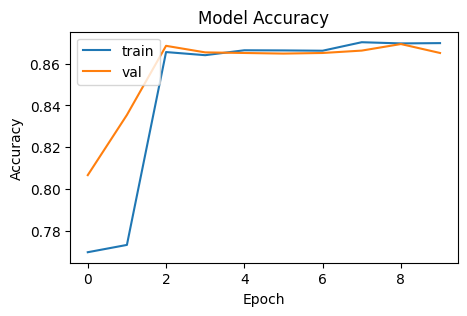

In [ ]:
# Creating a plot to see if our validation and training accuracy converged.
plt.figure(figsize =(5, 3))
plt.plot(history_glove_lstm.history['binary_accuracy'])
plt.plot(history_glove_lstm.history['val_binary_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Applying the same transformations on our validation dataset, so that
# now we can to predictions based on it and in fact see if the model is
# predicting correctly.
val_concat_glove_lstm_embedding = list(val_embedded_glove_concat["concat_embedding"])
val_input_glove_lstm_data = np.array(val_concat_glove_lstm_embedding)
val_input_glove_lstm_data = val_input_glove_lstm_data.reshape((3749, 1, 300))

In [ ]:
# Applying the same transformation for the labels of the validation set.
val_labels = list(val_label["unlisted"])
val_labels_data = np.array(val_labels)

In [ ]:
# Doing the prediction based on the validation set.
pred_y_glove_lstm = model_glove_lstm.predict(val_input_glove_lstm_data)

118/118 [==============================] - 1s 2ms/step


In [ ]:
# Converting our predictions into as single target of 0 or 1.
y_pred_glove_lstm_final = []
for doc in pred_y_glove_lstm:
    y_pred_glove_lstm_final.append(np.argmax(doc, axis=None, out=None))

In [ ]:
# Presenting our final evaluation metrics.
print(classification_report(val_labels_data, y_pred_glove_lstm_final))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2710
           1       0.71      0.83      0.77      1039

    accuracy                           0.86      3749
   macro avg       0.82      0.85      0.83      3749
weighted avg       0.87      0.86      0.86      3749



### 2.2.3. Distilbert Embedding on a LSTM

In [ ]:
# Applying the previously created function on our training, validation
# and glove datasets.
train_embedded_distilbert_concat =  concatenate_embeddings(train_embedded_distilbert)
val_embedded_distilbert_concat = concatenate_embeddings(val_embedded_distilbert)
test_embedded_distilbert_concat = concatenate_embeddings(test_embedded_distilbert)

In [ ]:
# We are going to input on the model an individual embedding per
# observation of size 1536.
input_ = Input(shape=(1,1536))

# Initiating a Bidirectional LSTM Layer.
lstm = LSTM(units=4)(input_)

# Setting the Activation Layer.
act = Dense(2, activation='sigmoid')(lstm)

# Settingn the Model Input and Output.
model_distilbert_lstm = Model(input_, act)

# Defining the Class Weights as we have an Unbalanced Dataset.
majority_freq = 0.723
minority_freq = 0.277
class_weights = [1 / majority_freq, 1 / minority_freq]

# Compiling our Model.
model_distilbert_lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"], loss_weights=class_weights)
model_distilbert_lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1, 1536)]         0         
                                                                 
 lstm_1 (LSTM)               (None, 4)                 24656     
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
Total params: 24,666
Trainable params: 24,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Transforming the Embeddings into a Tensor so it can be inputed in the model.
concat_embedding_distilbert_lstm = list(train_embedded_distilbert_concat["concat_embedding"])
input_data_distilbert_lstm = np.array(concat_embedding_distilbert_lstm)
input_data_distilbert_lstm = input_data_distilbert_lstm.reshape((8747, 1, 1536))

In [ ]:
# Tranforming the Labels into a Tensor and using TensorFlow One Hot on them
# as since we have 2 Neurons in our Activation Layer our Labels have to be
# also in this form.
labels = list(train_label["unlisted"])
labels_data = np.array(labels)
labels_data = tf.one_hot(labels_data, depth=2)

In [ ]:
# Fitting our model and calling verbose so we can see the progress.
history_distilbert_lstm = model_distilbert_lstm.fit(input_data_distilbert_lstm, labels_data, batch_size=16, epochs=20, verbose=1, validation_split=0.20)

Epoch 1/20
438/438 [==============================] - 5s 7ms/step - loss: 0.5273 - binary_accuracy: 0.8539 - val_loss: 0.4604 - val_binary_accuracy: 0.8729
Epoch 2/20
438/438 [==============================] - 2s 4ms/step - loss: 0.4518 - binary_accuracy: 0.8806 - val_loss: 0.4439 - val_binary_accuracy: 0.8789
Epoch 3/20
438/438 [==============================] - 2s 4ms/step - loss: 0.4387 - binary_accuracy: 0.8845 - val_loss: 0.4368 - val_binary_accuracy: 0.8823
Epoch 4/20
438/438 [==============================] - 2s 4ms/step - loss: 0.4305 - binary_accuracy: 0.8882 - val_loss: 0.4351 - val_binary_accuracy: 0.8811
Epoch 5/20
438/438 [==============================] - 2s 4ms/step - loss: 0.4217 - binary_accuracy: 0.8927 - val_loss: 0.4291 - val_binary_accuracy: 0.8843
Epoch 6/20
438/438 [==============================] - 2s 4ms/step - loss: 0.4109 - binary_accuracy: 0.8947 - val_loss: 0.4294 - val_binary_accuracy: 0.8823
Epoch 7/20
438/438 [==============================] - 2s 4ms/ste

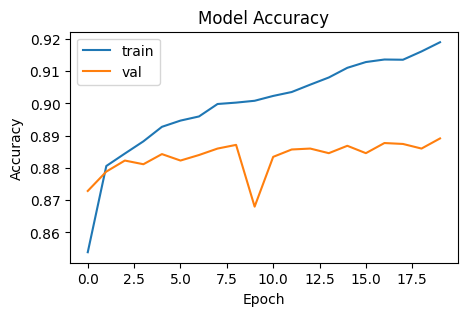

In [ ]:
# Creating a plot to see if our validation and training accuracy converged.
plt.figure(figsize =(5, 3))
plt.plot(history_distilbert_lstm.history['binary_accuracy'])
plt.plot(history_distilbert_lstm.history['val_binary_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Applying the same transformations on our validation dataset, so that
# now we can to predictions based on it and in fact see if the model is
# predicting correctly.
val_concat_embedding_lstm_distilbert = list(val_embedded_distilbert_concat["concat_embedding"])
val_input_data_distilbert_lstm = np.array(val_concat_embedding_lstm_distilbert)
val_input_data_distilbert_lstm = val_input_data_distilbert_lstm.reshape((3749, 1, 1536))

In [ ]:
# Applying the same transformation for the labels of the validation set.
val_labels = list(val_label["unlisted"])
val_labels_data = np.array(val_labels)

In [ ]:
# Doing the prediction based on the validation set.
pred_y_distilbert_lstm = model_distilbert_lstm.predict(val_input_data_distilbert_lstm)

118/118 [==============================] - 1s 3ms/step


In [ ]:
# Converting our predictions into as single target of 0 or 1.
y_pred_distilbert_lstm = []
for doc in pred_y_distilbert_lstm:
    y_pred_distilbert_lstm.append(np.argmax(doc, axis=None, out=None))

In [ ]:
# Presenting our final evaluation metrics.
print(classification_report(val_labels_data, y_pred_distilbert_lstm))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2710
           1       0.77      0.77      0.77      1039

    accuracy                           0.87      3749
   macro avg       0.84      0.84      0.84      3749
weighted avg       0.87      0.87      0.87      3749



### 2.2.4. XLMRoberta on a LSTM

In [ ]:
# Applying the previously created function on our training, validation
# and glove datasets.
train_embedded_xlmroberta_concat =  concatenate_embeddings(train_embedded_xlmroberta)
val_embedded_xlmroberta_concat = concatenate_embeddings(val_embedded_xlmroberta)
test_embedded_xlmroberta_concat = concatenate_embeddings(test_embedded_xlmroberta)

In [ ]:
# We are going to input on the model an individual embedding per
# observation of size 1536.
input_ = Input(shape=(1,2304))

# Initiating a Bidirectional LSTM Layer.
lstm = LSTM(units=4)(input_)

# Setting the Activation Layer.
act = Dense(2, activation='sigmoid')(lstm)

# Settingn the Model Input and Output.
model_xlmroberta_lstm = Model(input_, act)

# Defining the Class Weights as we have an Unbalanced Dataset.
majority_freq = 0.723
minority_freq = 0.277
class_weights = [1 / majority_freq, 1 / minority_freq]

# Compiling our Model.
model_xlmroberta_lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["binary_accuracy"], loss_weights=class_weights)
model_xlmroberta_lstm.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1, 2304)]         0         
                                                                 
 lstm_3 (LSTM)               (None, 4)                 36944     
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
Total params: 36,954
Trainable params: 36,954
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Transforming the Embeddings into a Tensor so it can be inputed in the model.
concat_xlmroberta_lstm = list(train_embedded_xlmroberta_concat["concat_embedding"])
input_data_xlmroberta_lstm = np.array(concat_xlmroberta_lstm)
input_data_xlmroberta_lstm = input_data_xlmroberta_lstm.reshape((8747, 1, 2304))

In [ ]:
# Tranforming the Labels into a Tensor and using TensorFlow One Hot on them
# as since we have 2 Neurons in our Activation Layer our Labels have to be
# also in this form.
labels = list(train_label["unlisted"])
labels_data = np.array(labels)
labels_data = tf.one_hot(labels_data, depth=2)

In [ ]:
# Fitting our model and calling verbose so we can see the progress.
history_xlmroberta_lstm = model_xlmroberta_lstm.fit(input_data_xlmroberta_lstm, labels_data, batch_size=16, epochs=20, verbose=1, validation_split=0.20)

Epoch 1/20
438/438 [==============================] - 5s 5ms/step - loss: 0.6081 - binary_accuracy: 0.8689 - val_loss: 0.4967 - val_binary_accuracy: 0.8674
Epoch 2/20
438/438 [==============================] - 2s 4ms/step - loss: 0.4703 - binary_accuracy: 0.8808 - val_loss: 0.4523 - val_binary_accuracy: 0.8817
Epoch 3/20
438/438 [==============================] - 2s 4ms/step - loss: 0.4550 - binary_accuracy: 0.8825 - val_loss: 0.4514 - val_binary_accuracy: 0.8863
Epoch 4/20
438/438 [==============================] - 2s 4ms/step - loss: 0.4446 - binary_accuracy: 0.8874 - val_loss: 0.4520 - val_binary_accuracy: 0.8823
Epoch 5/20
438/438 [==============================] - 2s 5ms/step - loss: 0.4384 - binary_accuracy: 0.8890 - val_loss: 0.4501 - val_binary_accuracy: 0.8854
Epoch 6/20
438/438 [==============================] - 2s 5ms/step - loss: 0.4318 - binary_accuracy: 0.8927 - val_loss: 0.4488 - val_binary_accuracy: 0.8880
Epoch 7/20
438/438 [==============================] - 2s 4ms/ste

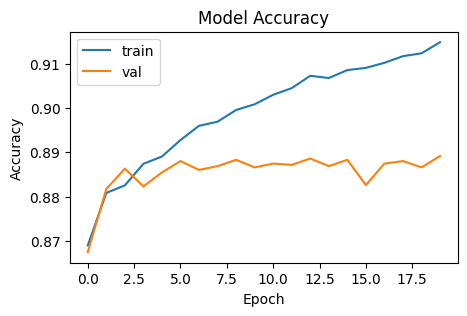

In [ ]:
# Creating a plot to see if our validation and training accuracy converged.
plt.figure(figsize =(5, 3))
plt.plot(history_xlmroberta_lstm.history['binary_accuracy'])
plt.plot(history_xlmroberta_lstm.history['val_binary_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Applying the same transformations on our validation dataset, so that
# now we can to predictions based on it and in fact see if the model is
# predicting correctly.
val_concat_embedding_xlmroberta_lstm = list(val_embedded_xlmroberta_concat["concat_embedding"])
val_input_data_xlmroberta_lstm = np.array(val_concat_embedding_xlmroberta_lstm)
val_input_data_xlmroberta_lstm = val_input_data_xlmroberta_lstm.reshape((3749, 1, 2304))

In [ ]:
# Applying the same transformation for the labels of the validation set.
val_labels = list(val_label["unlisted"])
val_labels_data = np.array(val_labels)

In [ ]:
# Doing the prediction based on the validation set.
pred_y_xlmroberta_lstm = model_xlmroberta_lstm.predict(val_input_data_xlmroberta_lstm)

118/118 [==============================] - 1s 2ms/step


In [ ]:
# Converting our predictions into as single target of 0 or 1.
y_pred_xlmroberta_lstm = []
for doc in pred_y_xlmroberta_lstm:
    y_pred_xlmroberta_lstm.append(np.argmax(doc, axis=None, out=None))

In [ ]:
# Presenting our final evaluation metrics.
print(classification_report(val_labels_data, y_pred_xlmroberta_lstm))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2710
           1       0.77      0.78      0.78      1039

    accuracy                           0.88      3749
   macro avg       0.84      0.85      0.85      3749
weighted avg       0.88      0.88      0.88      3749



# 3. Model Evaluation

## 3.1. Model Evaluation on TF-IDF Feature Engineering-based Models

In [ ]:
# Model Performance from using the TF-IDF Feature Engineering in the KNN.
print(classification_report(y_val, y_pred_gs_knn))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2710
           1       0.58      0.57      0.57      1039

    accuracy                           0.77      3749
   macro avg       0.71      0.70      0.70      3749
weighted avg       0.76      0.77      0.76      3749



In [ ]:
# Model Performance from using the TF-IDF Feature Engineering in the Logistic Regression.
print(classification_report(y_val, y_pred_gs_lr))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2710
           1       0.54      0.64      0.59      1039

    accuracy                           0.75      3749
   macro avg       0.70      0.72      0.70      3749
weighted avg       0.77      0.75      0.76      3749



In [ ]:
# Model Performance from using the TF-IDF Feature Engineering in the MLP.
print(classification_report(y_val, y_pred_gs_mlp))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2710
           1       0.57      0.45      0.50      1039

    accuracy                           0.76      3749
   macro avg       0.69      0.66      0.67      3749
weighted avg       0.74      0.76      0.75      3749



## 3.2. Model Evaluation on Embeddings-based LSTM models

In [ ]:
# Model Performance from using the GloVe Embeddings in the LSTM.
print(classification_report(val_labels_data, y_pred_glove_lstm_final))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2710
           1       0.71      0.83      0.77      1039

    accuracy                           0.86      3749
   macro avg       0.82      0.85      0.83      3749
weighted avg       0.87      0.86      0.86      3749



In [ ]:
# Model Performance from using the DistilBert Embeddings in the LSTM.
print(classification_report(val_labels_data, y_pred_distilbert_lstm))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2710
           1       0.77      0.77      0.77      1039

    accuracy                           0.87      3749
   macro avg       0.84      0.84      0.84      3749
weighted avg       0.87      0.87      0.87      3749



In [ ]:
# Model Performance from using the XLMRoberta Embeddings in the LSTM.
print(classification_report(val_labels_data, y_pred_xlmroberta_lstm))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      2710
           1       0.77      0.78      0.78      1039

    accuracy                           0.88      3749
   macro avg       0.84      0.85      0.85      3749
weighted avg       0.88      0.88      0.88      3749



# 4. Ready-to-Use Model and Final Prediction

First the final_test_embedding.csv.zip should be unziped in the the same folder that it was submitted in.

In [ ]:
# Saving the test embedding needed that will be inputed in the model
# for prediction.
# test_embedded_xlmroberta_concat["concat_embedding"] = test_embedded_xlmroberta_concat["concat_embedding"].apply(lambda x: ",".join(map(str, x)))
# test_embedded_xlmroberta_concat.to_csv("/content/drive/MyDrive/Text Mining Project/final_test_embedding.csv", index=False)

In [ ]:
# Specifying the path and file name for the saved model.
# model_path = "/content/drive/MyDrive/Text Mining Project/best_model_xlmroberta_lstm"

# Saving the best model.
# model_xlmroberta_lstm.save(model_path)

In [ ]:
# First the final_test_embedding.csv.zip should be unziped.
# Loading the test embedding needed that will then be inputed in the model
# for prediction.
test_embedded_xlmroberta_concat = pd.read_csv("final_test_embedding.csv")

# Transforming the embeddings from strings to lists.
test_embedded_xlmroberta_concat["concat_embedding"] = test_embedded_xlmroberta_concat["concat_embedding"].apply(lambda x: [float(i) if "." in i else int(i) for i in x.split(",")] if isinstance(x, str) else [])

In [ ]:
# Loading the best model.
model_xlmroberta_lstm = keras.models.load_model("best_model_xlmroberta_lstm")

In [ ]:
# Transforming our embedding in a tensor to use as an input in the final model.
concat_xlmroberta_lstm_test_set = list(test_embedded_xlmroberta_concat["concat_embedding"])
input_test_set_xlmroberta_lstm = np.array(concat_xlmroberta_lstm_test_set)
input_test_set_xlmroberta_lstm = input_test_set_xlmroberta_lstm.reshape((1389, 1, 2304))

# Predicting.
pred_y_test_set = model_xlmroberta_lstm.predict(input_test_set_xlmroberta_lstm)

44/44 [==============================] - 0s 2ms/step


In [ ]:
# Converting our predictions into as single target of 0 or 1.
final_target= []
for doc in pred_y_test_set:
    final_target.append(np.argmax(doc, axis=None, out=None))

In [ ]:
# Creating a DataFrame with the index from the test set and the respective label.
final_test_df_to_export = pd.DataFrame({"index": test_embedded_xlmroberta["index"], "unlisted": final_target})

In [ ]:
# Saving the csv file of prediction in our Google Drive.
# You have to select the path you want to save the prediction in.
final_test_df_to_export.to_csv("/content/drive/MyDrive/Text Mining Project/final_prediction.csv")